# Cyberbullying Detection on Twitter

## Introduction
In today's digital age, social media platforms have become a prominent avenue for communication and expression. However, the rise of these platforms has also led to an alarming increase in cyberbullying incidents, particularly during the Covid-19 pandemic when online interactions surged. This project aims to tackle this pressing issue by analyzing a dataset containing over 47,000 tweets labeled according to various classes of cyberbullying.

The primary objective of this project is to develop machine learning models that can automatically identify and flag potentially harmful tweets, thereby contributing to a safer online environment. By breaking down the patterns of hatred and discrimination found in these tweets, we hope to gain insights that can inform strategies to mitigate cyberbullying.

The dataset comprises tweets categorized into several types of cyberbullying, including ageism, ethnic discrimination, gender-based attacks, and religious intolerance, as well as tweets that do not fall under these categories. Each category contains approximately 8,000 samples, ensuring a balanced dataset for effective model training.

Throughout this notebook, we will perform various analyses, including exploratory data analysis (EDA), data visualization, and the development of classification models. We will evaluate the models using key performance metrics such as accuracy, precision, recall, and F1 score. Ultimately, this project seeks to shed light on the patterns of cyberbullying on social media and pave the way for future advancements in detection techniques.

Let’s begin by loading the necessary libraries and the dataset for our analysis.

## Table of Contents
1. [Package Installation](#package-installation)
2. [Library Imports](#library-imports)
3. [Data Loading](#data-loading)
4. [Initial Data Exploration](#initial-data-exploration)
5. [Data Preparation](#data-preparation)
6. [Data Visualization](#data-visualization)
7. [Modeling](#modeling)
8. [Model Evaluation](#model-evaluation)
9. [Conclusion and Next Steps](#conclusion-and-next-steps)

## Package Installation

In this cell, we will install the necessary Python packages for our data analysis project. This step ensures that all the libraries required for data manipulation, visualization, and natural language processing are available in our environment. We will use the `pip` command to install the following libraries:

- **NumPy**: A library for numerical calculations and array manipulation.
- **Pandas**: A powerful library for data manipulation and analysis, particularly useful for working with structured data.
- **Matplotlib**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: A statistical data visualization library based on Matplotlib that provides a high-level interface for creating attractive graphics.
- **NLTK**: The Natural Language Toolkit, a library for working with natural language processing.
- **Wordcloud**: A library for generating word clouds, which are visual representations of words where the frequency of each word is indicated by the font size.
- **Emoji**: A library that facilitates the use of emojis in text and visualizations.

In [1]:
# List of required libraries
required_libraries = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'nltk',
    'wordcloud',
    'emoji'
]

def install(package):
    """Install the package using pip in a Jupyter Notebook."""
    print(f"Installing {package}...")
    # Use the Jupyter magic command for installation
    get_ipython().system(f'pip install {package}')

def check_libraries(libraries):
    """Check if the libraries are installed and install them if necessary."""
    missing_libraries = []

    for library in libraries:
        try:
            __import__(library)
        except ImportError:
            missing_libraries.append(library)
        except Exception as e:
            # Captura outros erros que podem ocorrer durante a importação
            print(f"Error importing {library}: {e}")
            missing_libraries.append(library)

    if missing_libraries:
        print(f"The following libraries are missing: {', '.join(missing_libraries)}")
        print("Starting installation...")

        installation_success = True  # Flag to track installation success

        for library in missing_libraries:
            try:
                install(library)
                print(f"{library} installed successfully.")
            except Exception as e:
                print(f"Failed to install {library}: {e}")
                installation_success = False  # Mark as failed if there was an error

        # Check again if the libraries were installed
        for library in missing_libraries:
            try:
                __import__(library)
            except ImportError:
                print(f"Error: {library} was not installed correctly.")
                installation_success = False  # Mark as failed if still missing

        # Final message based on installation success
        if installation_success:
            print("All libraries were installed successfully.")
        else:
            print("Some libraries were not installed correctly.")
    else:
        print("All libraries are already installed.")

if __name__ == "__main__":
    check_libraries(required_libraries)

All libraries are already installed.


## Library Imports <a name="library-imports"></a>
In this cell, we will import all the necessary libraries that we will use throughout the analysis. This includes libraries for data manipulation, visualization, and machine learning.

In [2]:
# Standard Libraries
import re
import warnings

# Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import emoji

# Machine Learning Libraries
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Other Libraries
from wordcloud import WordCloud

## Data Loading <a name="data-loading"></a>
Here, we will load the dataset containing information about Cyberbullying Detection on Twitter and related factors. We will examine the structure of the data and check for any initial issues such as missing values.

In [3]:
warnings.filterwarnings('ignore')

# Paths to the CSV files
path_data = '../data/cyberbullying_tweets.csv'

# Reading the CSV files
df = pd.read_csv(path_data)

In [4]:
# Display the first few rows of dataset to verify the reading
print("\nCyberbullying Data:")
print(df.head())


Cyberbullying Data:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [5]:
# Using shape to check the dimensions of the combined DataFrame
print("\nShape of Combined Data:", df.shape)


Shape of Combined Data: (47692, 2)


## Initial Data Exploration <a name="initial-data-exploration"></a>
In this section, we will conduct an exploratory data analysis (EDA) to gain a deeper understanding of our dataset. This analysis is crucial as it lays the foundation for the subsequent steps in our data cleaning and preparation process. We will examine various aspects of the data, including data types, summary statistics, and the presence of any missing values.

First, we will check for missing values in the dataset. Identifying any gaps in the data is essential, as they can impact the performance of our machine learning models. Our dataset contains two key columns: tweet_text and cyberbullying_type. Upon inspection, we found that there are no missing values in either column, indicating that we have a complete dataset to work with.

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 tweet_text            0
cyberbullying_type    0
dtype: int64


In [7]:
# Check data types
data_types = df.dtypes
print("\nData Types of Each Column:\n", data_types)


Data Types of Each Column:
 tweet_text            object
cyberbullying_type    object
dtype: object


In [8]:
# Summary statistics for numerical columns
summary_statistics = df.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
                                                tweet_text cyberbullying_type
count                                               47692              47692
unique                                              46017                  6
top     RT @sailorhg: the intro for my hardware hackin...           religion
freq                                                    2               7998


We will also explore the unique values within the cyberbullying_type column. The distribution of categories reveals the prevalence of different types of cyberbullying within our dataset. For example, the highest frequency is observed in the religion category, with 7,998 instances, followed closely by age and gender.

In [9]:
# Check unique values in categorical columns
for column in df[['cyberbullying_type']].select_dtypes(include=['object']).columns:
    print(f"\nUnique Values in '{column}':\n", df[column].value_counts())


Unique Values in 'cyberbullying_type':
 cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


Finally, we will visualize the distribution of cyberbullying categories using a bar plot. This graphical representation will allow us to quickly assess the balance of instances across different categories. The plot will display the number of occurrences for each category, making it easier to identify which types of cyberbullying are most prevalent in the dataset.

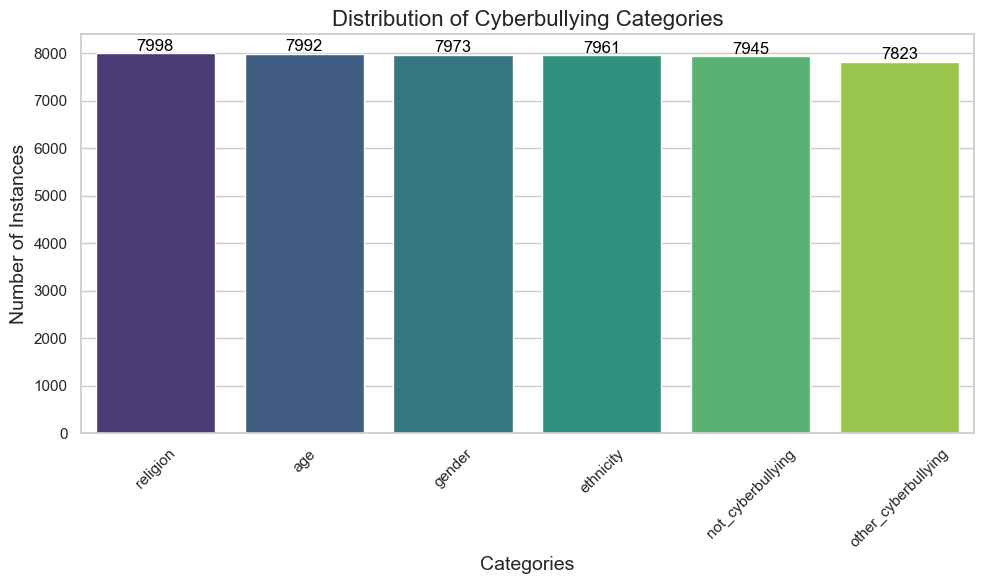

In [10]:
# Plotting the distribution graph

# Check the distribution of categories
category_counts = df['cyberbullying_type'].value_counts()  # Change 'label' to your actual column name for categories

# Create a DataFrame for the counts
category_distribution = category_counts.reset_index()
category_distribution.columns = ['Category', 'Count']  # Rename columns for clarity

# Set the visual style of the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
bar_plot = sns.barplot(data=category_distribution, x='Category', y='Count', palette='viridis')

# Add titles and labels
plt.title('Distribution of Cyberbullying Categories', fontsize=16)  # Title of the plot
plt.xlabel('Categories', fontsize=14)  # X-axis label
plt.ylabel('Number of Instances', fontsize=14)  # Y-axis label

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Add value annotations on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      fontsize=12, color='black', 
                      xytext=(0, 5),
                      textcoords='offset points')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

## Data Preparation <a name="data-preparation"></a>
Before we can build our machine learning models, it is crucial to prepare the data adequately. This process involves several steps, including handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets. Additionally, we will analyze the distribution of tweet lengths and clean the text data to enhance the model's performance.

First, we will calculate the length of each tweet and create a new column, tweet_length, in the DataFrame. This step allows us to analyze the distribution of tweet lengths, which can provide insights into the nature of the data.

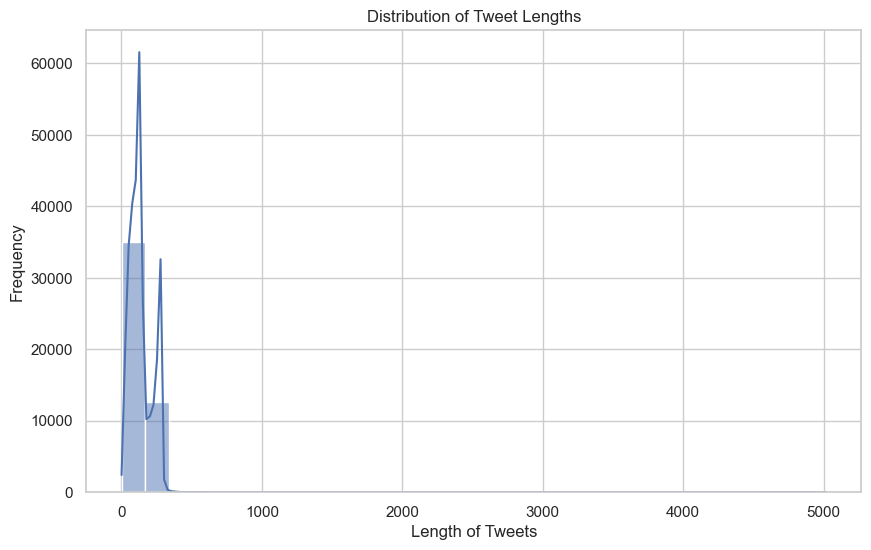

In [11]:
# Calculate the length of each tweet and create a new column 'tweet_length' in the DataFrame
df['tweet_length'] = df['tweet_text'].apply(len)

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram of the tweet lengths with a Kernel Density Estimate (KDE) overlay
sns.histplot(df['tweet_length'], bins=30, kde=True)

# Set the title of the plot
plt.title('Distribution of Tweet Lengths')

# Set the label for the x-axis
plt.xlabel('Length of Tweets')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

Next, we will check for outliers in the tweet lengths. Outliers can skew the results of our analysis and affect model performance. To identify outliers, we will calculate the Interquartile Range (IQR) and filter out lengths that fall outside the defined bounds.

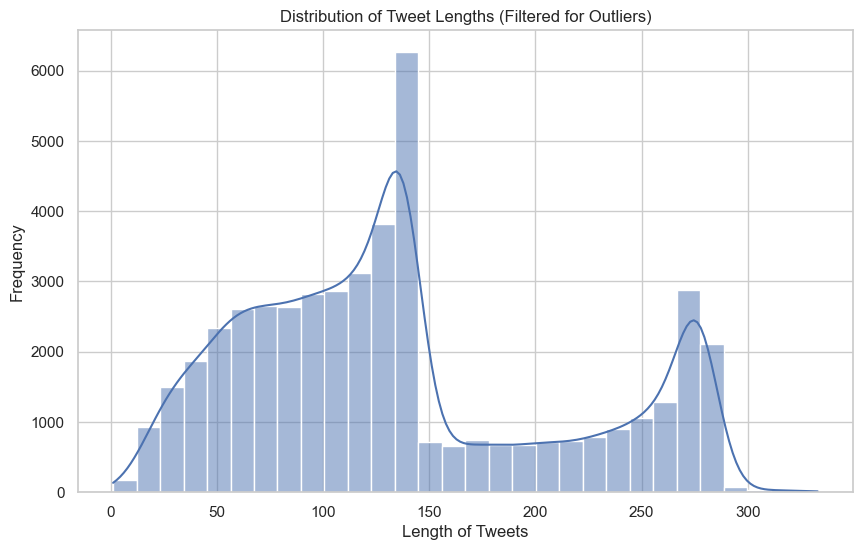

In [12]:
# Calculate the length of each tweet and create a new column 'tweet_length' in the DataFrame
df['tweet_length'] = df['tweet_text'].apply(len)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['tweet_length'].quantile(0.25)
Q3 = df['tweet_length'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['tweet_length'] >= lower_bound) & (df['tweet_length'] <= upper_bound)]

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram of the tweet lengths with a Kernel Density Estimate (KDE) overlay
sns.histplot(df['tweet_length'], bins=30, kde=True)

# Set the title of the plot
plt.title('Distribution of Tweet Lengths (Filtered for Outliers)')

# Set the label for the x-axis
plt.xlabel('Length of Tweets')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

To gain further insights, we will create a box plot to visualize the distribution of tweet lengths across different categories of cyberbullying. This can help identify if certain types of cyberbullying are associated with longer or shorter tweets.

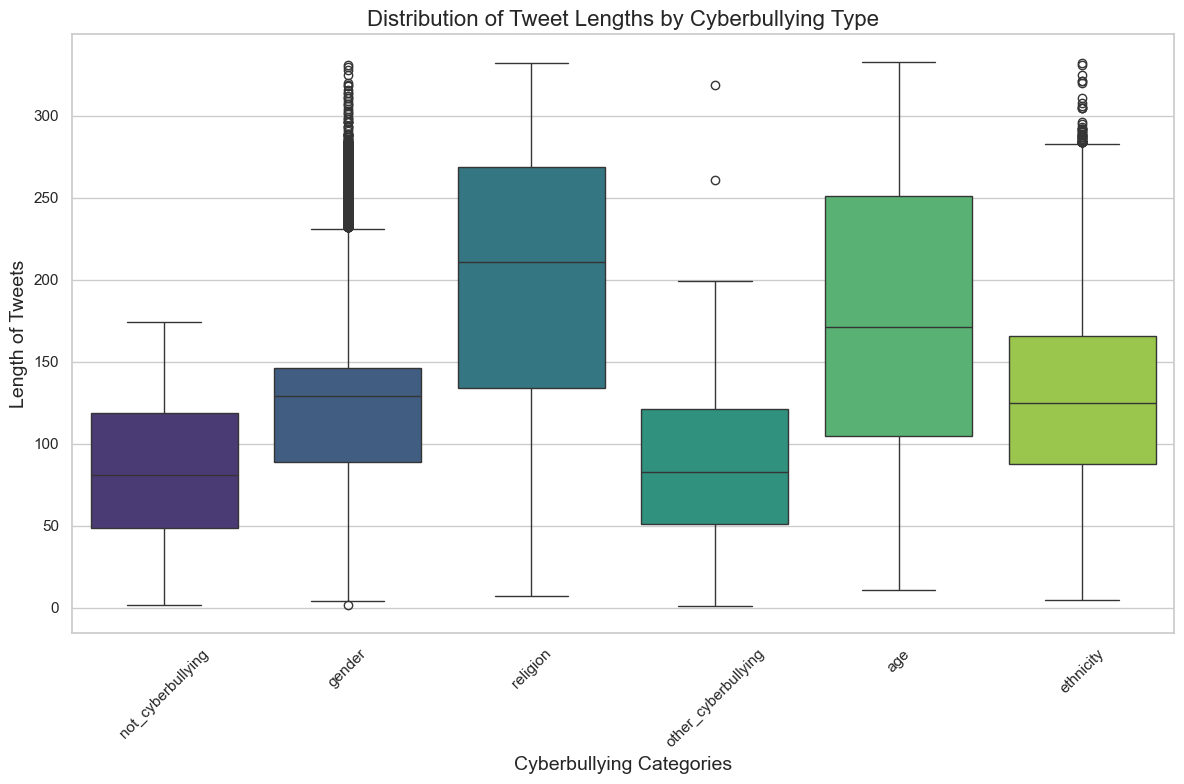

In [13]:
# Calculate the length of the tweets
df['length'] = df['tweet_text'].apply(len)  # Create a new column 'length' with the length of the tweets

# Set the visual style of the plot
sns.set(style="whitegrid")  # Set the background style for the plot

# Create a box plot to show the distribution of tweet lengths by cyberbullying type
plt.figure(figsize=(12, 8))  # Set the figure size
box_plot = sns.boxplot(data=df, x='cyberbullying_type', y='length', palette='viridis')  # Create a box plot

# Add titles and labels
plt.title('Distribution of Tweet Lengths by Cyberbullying Type', fontsize=16)  # Title of the plot
plt.xlabel('Cyberbullying Categories', fontsize=14)  # X-axis label
plt.ylabel('Length of Tweets', fontsize=14)  # Y-axis label

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()  # Display the box plot

Finally, we will preprocess the tweet text to prepare it for modeling. This involves cleaning the text by removing URLs, mentions, and special characters, converting text to lowercase, handling emojis, removing stop words, and applying lemmatization.

In [14]:
# Make sure to have these resources downloaded
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to process and clean tweets
def preprocess_tweet(tweet):
    # Remove URLs, mentions, and special characters
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+', '', tweet) 
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet) 

    # Convert to lowercase
    tweet = tweet.lower()

    # Handle emojis (optional: you can translate emojis into words or remove them)
    tweet = emoji.demojize(tweet) 

    # Remove stop words
    tweet = ' '.join(word for word in tweet.split() if word not in stop_words) 

    # Lemmatization
    tweet = ' '.join(lemmatizer.lemmatize(word) for word in tweet.split()) 

    return tweet

# Apply the preprocessing function
df['cleaned_text'] = df['tweet_text'].apply(preprocess_tweet)

[nltk_data] Error loading stopwords: <urlopen error [WinError 10061]
[nltk_data]     Es konnte keine Verbindung hergestellt werden, da der
[nltk_data]     Zielcomputer die Verbindung verweigerte>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10061] Es
[nltk_data]     konnte keine Verbindung hergestellt werden, da der
[nltk_data]     Zielcomputer die Verbindung verweigerte>


## Data Visualization <a name="data-visualization"></a>
Data visualization is a crucial step in understanding trends and patterns within our dataset. In this section, we will create various plots to visualize the relationships between different variables, with a specific focus on the frequency of words in tweets related to cyberbullying. Through these visualizations, we aim to gain insights that can inform our analysis and decision-making processes.

First, we will analyze the frequency of words in the cleaned tweet text. This analysis helps us identify the most common words associated with cyberbullying, which can provide insight into the language used in harmful tweets.

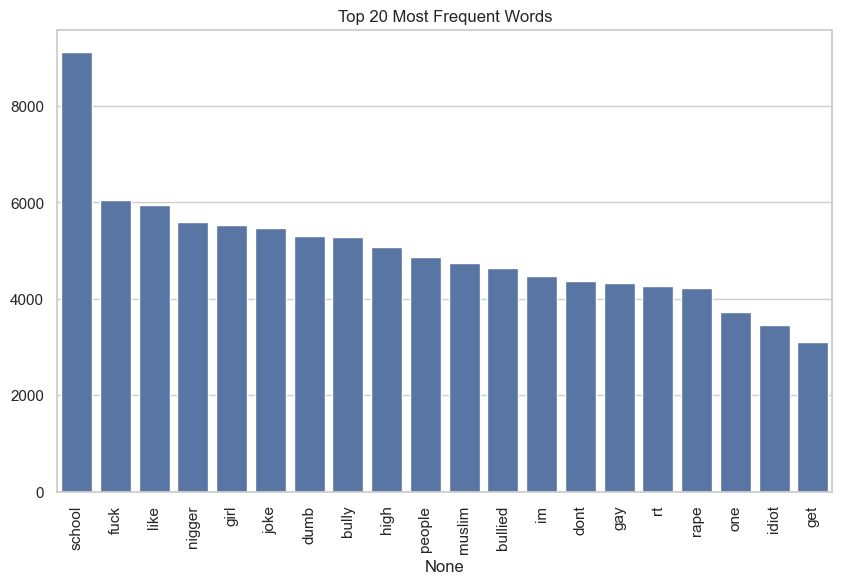

In [15]:
# Initialize the Count Vectorizer with a maximum of 1000 features
vectorizer = CountVectorizer(max_features=1000)

# Fit and transform the cleaned text data into a matrix of token counts
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

# Visualization of word frequency
# Create a DataFrame from the matrix with feature names as columns
word_freq = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

# Sum the frequencies of each word and sort them in descending order
word_freq_sum = word_freq.sum().sort_values(ascending=False)

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot for the top 20 most frequent words
sns.barplot(x=word_freq_sum.head(20).index, y=word_freq_sum.head(20).values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Top 20 Most Frequent Words')

# Display the plot
plt.show()

In this plot, we display the top 20 most frequent words found in our cleaned tweets. The bar chart allows us to quickly identify which words are most commonly associated with the cyberbullying categories in our dataset.

Next, we will create a word cloud to visualize the most impactful words in the dataset. A word cloud provides a visually engaging way to highlight the frequency of words, where more frequently occurring words appear larger than less frequent ones.

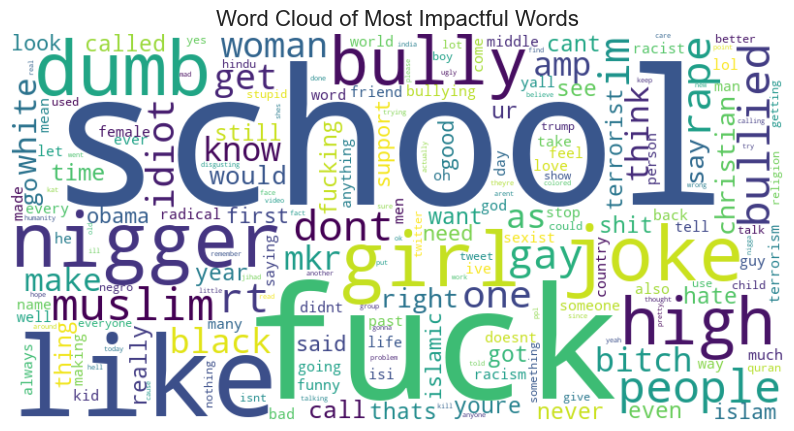

In [16]:
# Initialize the Count Vectorizer with a maximum of 1000 features
vectorizer = CountVectorizer(max_features=1000)

# Fit and transform the cleaned text data into a matrix of token counts
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

# Create a DataFrame from the matrix with feature names as columns
word_freq = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

# Sum the frequencies of each word and sort them in descending order
word_freq_sum = word_freq.sum().sort_values(ascending=False)

# Create a string of words based on their frequencies
word_freq_dict = word_freq_sum.to_dict()  # Convert the word frequencies to a dictionary

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      colormap='viridis', 
                      max_words=200).generate_from_frequencies(word_freq_dict)

# Set up the plot for the word cloud
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud
plt.axis('off')  # Turn off the axis

# Set the title of the word cloud
plt.title('Word Cloud of Most Impactful Words', fontsize=16)

# Show the plot
plt.show()

The word cloud generated above visually represents the most impactful words in our dataset. This format allows us to quickly grasp the most significant terms related to cyberbullying, facilitating a deeper understanding of the language used in harmful tweets.

## Modeling <a name="modeling"></a>
In this section, we will build and evaluate machine learning models to predict instances of cyberbullying based on the textual content of tweets. Our goal is to select appropriate algorithms, fit them to our training data, and assess their performance using various metrics.

We begin by splitting our dataset into training and testing sets. The training set will be used to train our models, while the testing set will allow us to evaluate their performance on unseen data.

In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['cyberbullying_type'], test_size=0.2, random_state=42)

Since our target variable consists of string labels (categories of cyberbullying), we will encode these labels into numerical values. This transformation is necessary for our machine learning models to interpret the data correctly.

In [18]:
# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

We will use TfidfVectorizer to convert our text data into a matrix of TF-IDF features. This representation captures the importance of words in relation to the corpus, which is essential for improving the performance of our models.

In [19]:
# Define a common TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

We will define a function to create and train our models using a pipeline. This pipeline will combine the TF-IDF vectorization step with the chosen machine learning model. We will also implement GridSearchCV to perform hyperparameter tuning, allowing us to identify the best parameters for each model.

In [20]:
# Function to create and train models
def train_model(model, param_grid, X_train, y_train):
    pipeline = make_pipeline(tfidf_vectorizer, model)
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search

We will define a set of models along with their corresponding hyperparameters for tuning. The models chosen include Naive Bayes, SVM, XGBoost, and Random Forest. Each model will be associated with a dictionary of hyperparameters to be optimized during training.

In [21]:
# Define models and their hyperparameters
models = {
    # Uncomment and define Naive Bayes and SVM if needed
    'Naive Bayes': (MultinomialNB(), {'multinomialnb__alpha': [0.1, 1, 10]}),
    'SVM': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), {
        'xgbclassifier__n_estimators': [50, 100, 200], 
        'xgbclassifier__max_depth': [3, 5, 7], 
        'xgbclassifier__learning_rate': [0.01, 0.1, 0.2]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'randomforestclassifier__n_estimators': [50, 100, 200], 
        'randomforestclassifier__max_depth': [None, 10, 20], 
        'randomforestclassifier__min_samples_split': [2, 5, 10]
    })
}

We will iterate through each model, train it using the training set, and store the predictions for the test set. This will allow us to evaluate the performance of each model on the unseen data.

In [22]:
# Train models and store predictions
predictions = {}
for model_name, (model, param_grid) in models.items():
    print(f'Training {model_name}...')
    trained_model = train_model(model, param_grid, X_train, y_train_encoded)  # Use encoded labels
    y_pred = trained_model.predict(X_test)
    predictions[model_name] = label_encoder.inverse_transform(y_pred)  # Convert back to original labels
    print(f'{model_name} trained and predictions made.')

# Example of how to access predictions
# Uncomment if you have Naive Bayes and SVM models defined
y_pred_nb = predictions['Naive Bayes']
y_pred_svm = predictions['SVM']
y_pred_rf = predictions['Random Forest']
y_pred_xgb = predictions['XGBoost']

Training Naive Bayes...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Naive Bayes trained and predictions made.
Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


## Model Evaluation <a name="model-evaluation"></a>
After building our models, it is crucial to evaluate their performance to determine how well they can predict instances of cyberbullying based on the textual content of tweets. In this section, we will assess each model using various metrics, including accuracy, precision, recall, and F1-score. We will compare the predictions against the actual outcomes to gain insights into the effectiveness of our models.

We will start by creating a dictionary to store the evaluation results for each model. This will include the accuracy score and a detailed classification report.

In [49]:
# Initialize a dictionary to store evaluation results
results = {}

Next, we will loop through the predictions dictionary, which contains the predicted labels from each model. For each model, we will:

- Calculate the accuracy score.
- Generate a classification report that includes precision, recall, and F1-score for each class.
- Store these results in our results dictionary for later reference.

To further analyze model performance, we will generate and display a confusion matrix for each model. The confusion matrix provides a comprehensive view of how many instances were correctly or incorrectly classified for each category. This visualization will help us identify specific areas where the model may be struggling.

Model: Naive Bayes
Accuracy: 0.7525
Classification Report:
                     precision    recall  f1-score   support

                age       0.77      0.96      0.86      1586
          ethnicity       0.88      0.94      0.91      1592
             gender       0.73      0.82      0.77      1526
  not_cyberbullying       0.64      0.40      0.49      1624
other_cyberbullying       0.56      0.45      0.50      1603
           religion       0.83      0.96      0.89      1591

           accuracy                           0.75      9522
          macro avg       0.74      0.75      0.74      9522
       weighted avg       0.73      0.75      0.73      9522



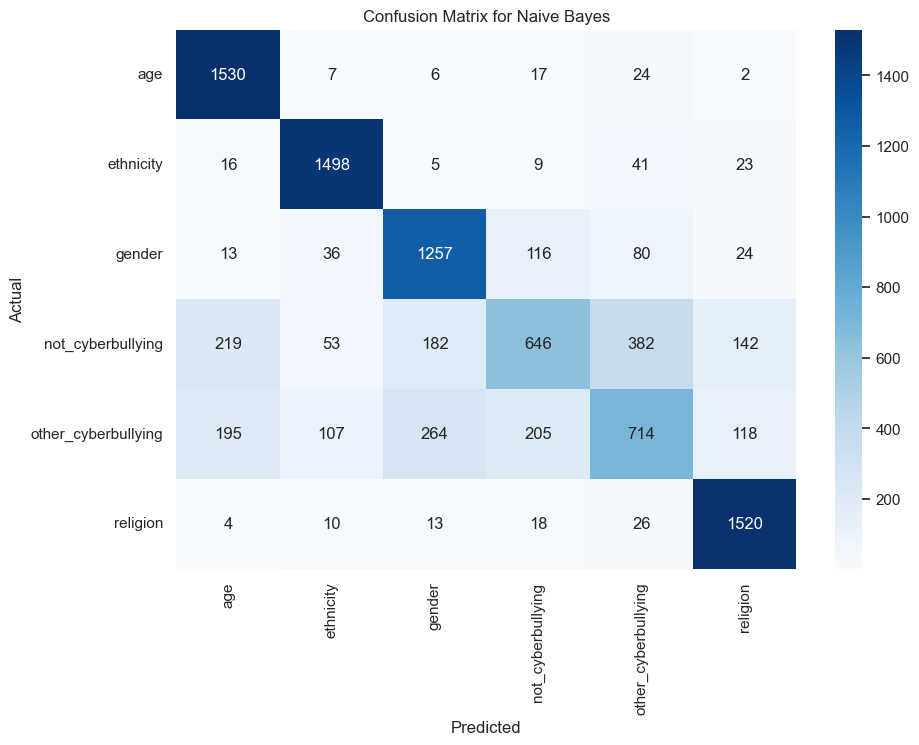

Model: SVM
Accuracy: 0.8221
Classification Report:
                     precision    recall  f1-score   support

                age       0.95      0.98      0.96      1586
          ethnicity       0.98      0.98      0.98      1592
             gender       0.89      0.85      0.87      1526
  not_cyberbullying       0.62      0.43      0.51      1624
other_cyberbullying       0.57      0.76      0.66      1603
           religion       0.96      0.94      0.95      1591

           accuracy                           0.82      9522
          macro avg       0.83      0.82      0.82      9522
       weighted avg       0.83      0.82      0.82      9522



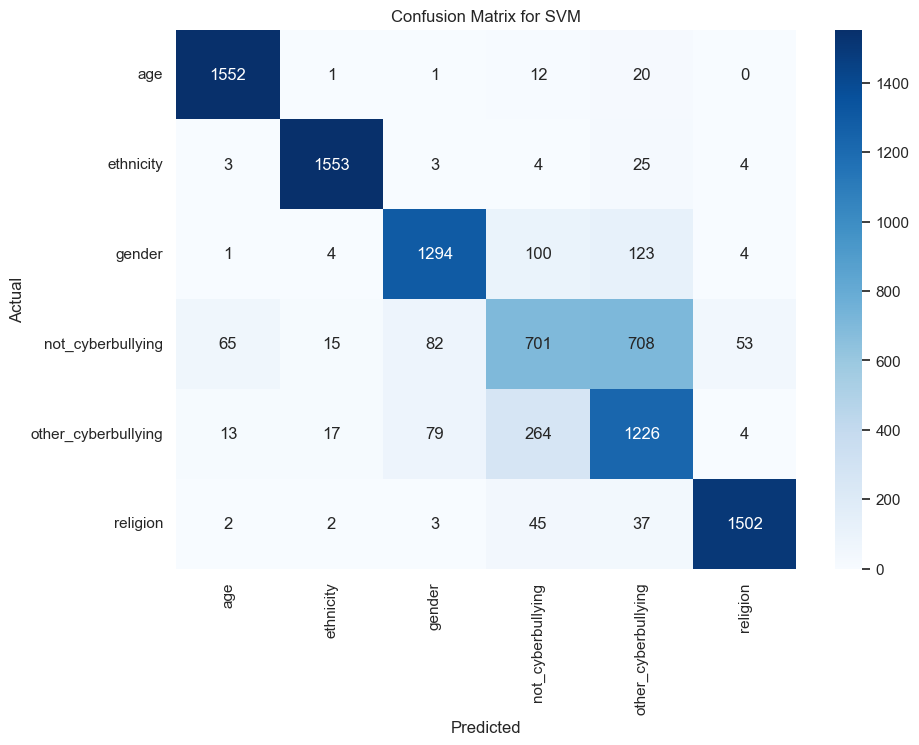

Model: XGBoost
Accuracy: 0.8296
Classification Report:
                     precision    recall  f1-score   support

                age       0.99      0.97      0.98      1586
          ethnicity       0.99      0.98      0.99      1592
             gender       0.90      0.83      0.87      1526
  not_cyberbullying       0.68      0.41      0.51      1624
other_cyberbullying       0.55      0.84      0.67      1603
           religion       0.97      0.94      0.95      1591

           accuracy                           0.83      9522
          macro avg       0.85      0.83      0.83      9522
       weighted avg       0.85      0.83      0.83      9522



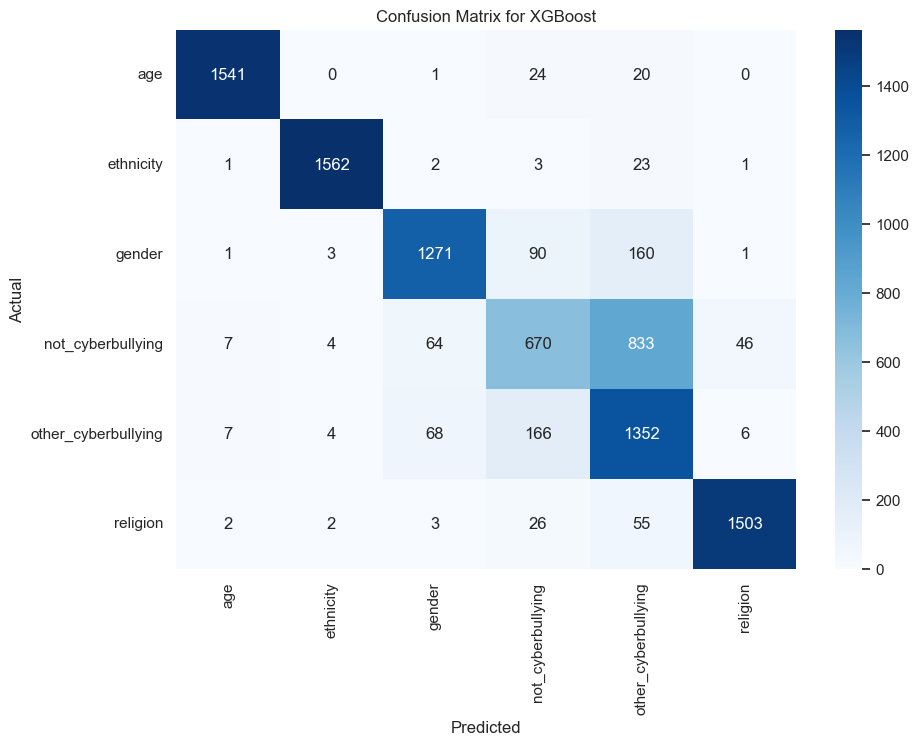

Model: Random Forest
Accuracy: 0.8098
Classification Report:
                     precision    recall  f1-score   support

                age       0.99      0.98      0.98      1586
          ethnicity       0.99      0.98      0.99      1592
             gender       0.87      0.85      0.86      1526
  not_cyberbullying       0.55      0.47      0.50      1624
other_cyberbullying       0.54      0.64      0.58      1603
           religion       0.96      0.95      0.96      1591

           accuracy                           0.81      9522
          macro avg       0.81      0.81      0.81      9522
       weighted avg       0.81      0.81      0.81      9522



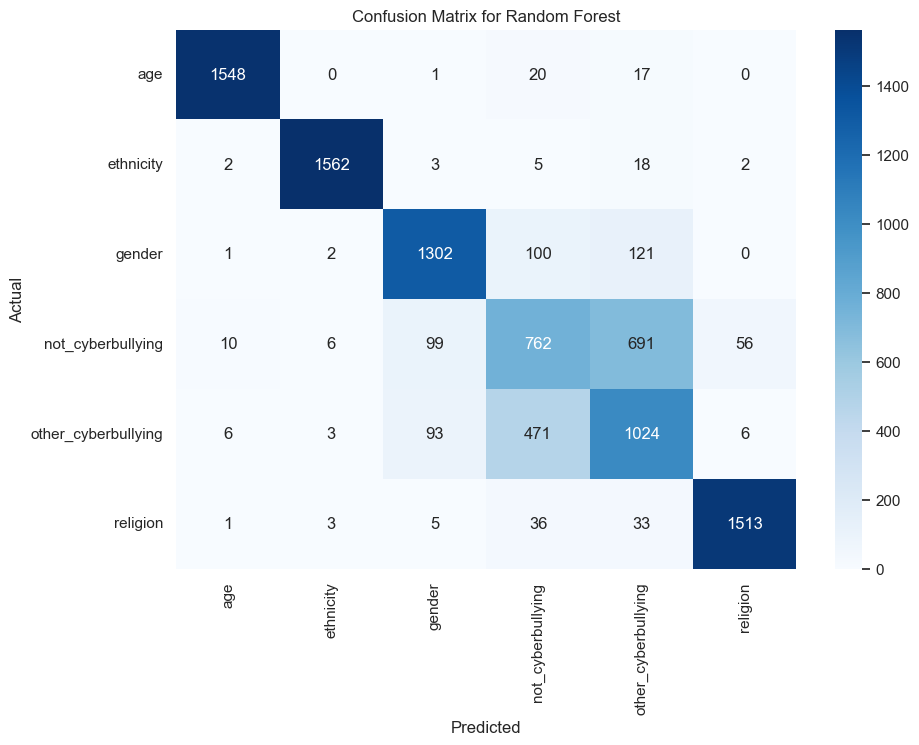

In [50]:
# Loop through the predictions dictionary to evaluate each model
for model_name, y_pred in predictions.items():
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    # Store results in the results dictionary
    results[model_name] = {
        'accuracy': accuracy,
        'report': report
    }

    # Print the evaluation results for the current model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    # Generate and display the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Finally, we will determine which model performed the best based on accuracy. This step is essential as it allows us to identify the most effective model for detecting cyberbullying in tweets.

In [51]:
# Determine the best model based on accuracy
best_model = max(results, key=lambda x: results[x]['accuracy'])
best_accuracy = results[best_model]['accuracy']

print(f"The best model is: {best_model} with an accuracy of {best_accuracy:.4f}.")

The best model is: XGBoost with an accuracy of 0.8296.


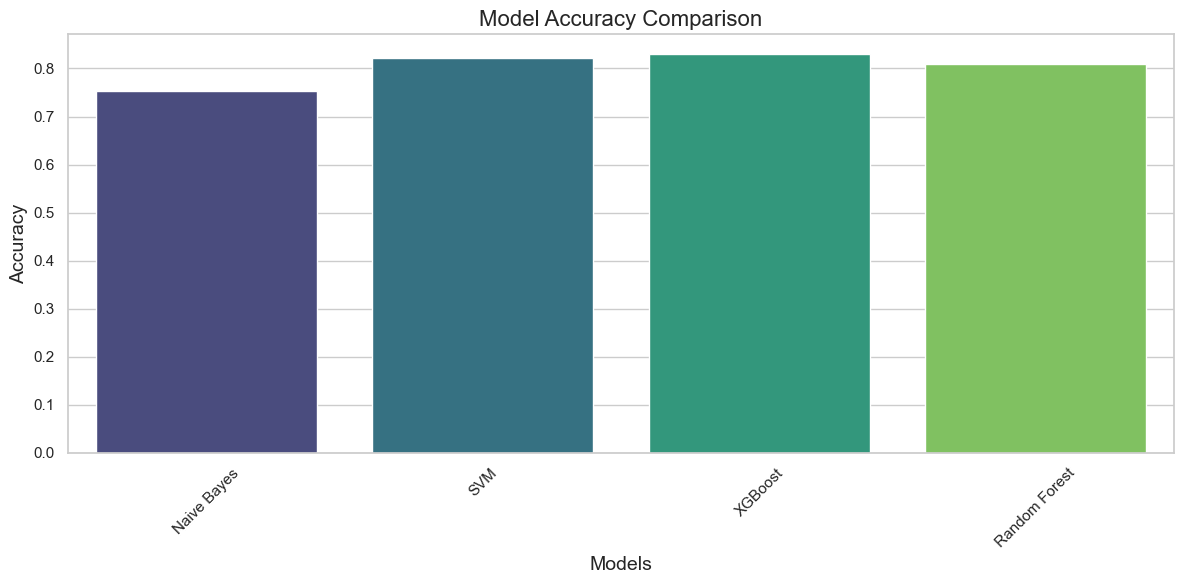

In [52]:
# Prepare data for plotting
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

# Create a DataFrame for better plotting
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot for model accuracy
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## Conclusion and Next Steps <a name="conclusion-and-next-steps"></a>
In this project, we developed machine learning models to detect various forms of cyberbullying on Twitter. Our analysis revealed significant insights into the prevalence of different types of cyberbullying, with religion and age being the most common categories. The models achieved varying levels of accuracy, with XGBoost performing the best at 82.96%.

### Recommendations:
- Implement Monitoring Tools: Social media platforms should consider implementing automated monitoring tools to detect and flag harmful content in real-time.
- Educational Initiatives: Schools and organizations should promote awareness programs about the effects of cyberbullying and encourage positive online behavior.

### Future Work:
- Real-Time Detection: Explore the implementation of the model as a real-time detection system for social media platforms.
- Deep Learning Approaches: Investigate the use of deep learning techniques to improve accuracy in text classification tasks.

By continuing to refine our models and approaches, we can contribute to creating a safer online environment for all users.